In [1]:
#python specific stuff
import numpy as np
import matplotlib.pyplot as plt
import time


In [2]:
#cell heat transfer equation
#wall is divided into cells with heat transfer between each

def calculate_Qout(U,area_cell,T1,T2,length_cell):
    Qout=U*area_cell*(T1-T2)/length_cell
    return Qout

def calculate_Tchange(Qin,Qout,t_step,densityC,volume_cell):
    DT=(Qin-Qout)*t_step/(densityC*volume_cell)
    return DT
    

In [32]:
 #initialize constants for wall
U=0.1
densityC=494000

#inputs
Qin=20

#time 
t_step=60
N_t_steps=1000
t_final=t_step*N_t_steps
#distance
N_cells=20
length_cell=0.01
area_cell=1
volume_cell=area_cell*length_cell
wall_length=N_cells*length_cell

#build inital conditions for array of wall cells, 
inital_T=10 #deg C
wall_array=np.full([N_cells],inital_T)

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10])

In [4]:
#data array to hold all data, axis 1 is x-position, 2 is time step
data_array=np.zeros((N_cells,N_t_steps))

In [42]:
#now do calculation - this may take some time
#indexing of array begins at 0
T_change_xarray=np.zeros(N_cells)

Qin_xarray=np.zeros(N_cells-1)
Qin_xarray[0]=Qin

for t in range(N_t_steps):
    data_array[:,t]=wall_array
    #for x in range(N_cells-1):
    Qout_xarray=calculate_Qout(U,area_cell,wall_array[0:N_cells-1],wall_array[1:N_cells],length_cell) 
    Qin_xarray[1:(N_cells-1)]=Qout_xarray[0:(N_cells-2)]
    wall_array=wall_array+np.append(calculate_Tchange(Qin_xarray[0:N_cells-1],Qout_xarray,t_step,densityC,volume_cell),0) # last value zero so fixed temp and wall./outside boundary


Text(0, 0.5, 'Temperature (C)')

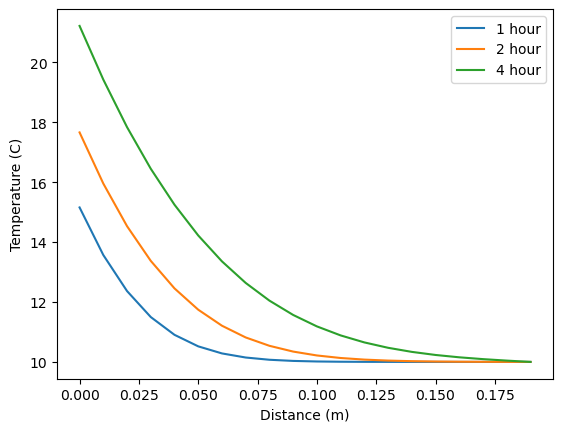

In [43]:
x_array=np.arange(0,wall_length,length_cell)
t_1min=60/t_step
t_60min=60*t_1min
t_120min=120*t_1min
t_240min=240*t_1min

plt.plot(x_array,data_array[:,int(t_60min)],label='1 hour')
plt.plot(x_array,data_array[:,int(t_120min)],label='2 hour')
plt.plot(x_array,data_array[:,int(t_240min)],label='4 hour')
plt.legend()
plt.xlabel('Distance (m)')
plt.ylabel('Temperature (C)')

In [ ]:
t_array=np.arange(0,N_t_steps*t_step,t_step)/60
x_10cm=0.01/length_cell
x_20cm=0.03/length_cell

plt.plot(t_array,data_array[0,:],label='x=0cm')
plt.plot(t_array,data_array[int(x_10cm),:],label='x=10cm')
plt.plot(t_array,data_array[int(x_20cm),:],label='x=30cm')
plt.legend()
plt.xlabel('Time (mins)')
plt.ylabel('Temperature (C)')